In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
from IPython.display import display

### Create Train and test sets

In [29]:
# Create column names lists for the features and the target
num_attributes = ['age', 'new_user','total_pages_visited']
target_label = ['converted']

In [30]:
#Split data into train and test sets
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [31]:
# Separate features and target in train and test data sets
X_train = train_set.drop(target_label, axis=1)
y_train = train_set['converted'].copy()

X_test = test_set.drop(target_label, axis=1)
y_test = test_set['converted'].copy()

In [32]:
print('Distribution of original train_data')
y_train.value_counts()*100/y_train.shape[0]

Distribution of original train_data


0    96.783857
1     3.216143
Name: converted, dtype: float64

## 2. Baseline model 
### Logistic Regression with default parameters 

One variable: total_pages_visited

In [35]:
log_reg = LogisticRegression()
# Take only total_visited_pages
X_train_default = X_train[['total_pages_visited']]
log_reg.fit(X_train_default, y_train.values.ravel())
print("Mean accuracy")
log_reg.score(X_train_default, y_train) # It executes a log_reg.predict and then calculates the correct predictions from the ensemble

Mean accuracy


0.9829178087005411

### Confusion matrix

In [36]:
def labels_conf_matrix(conf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return labels

In [37]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, log_reg.predict(X_train_default))

conf_matrix

array([[219376,    966],
       [  2923,   4399]])

In [38]:
labels =labels_conf_matrix(conf_matrix)

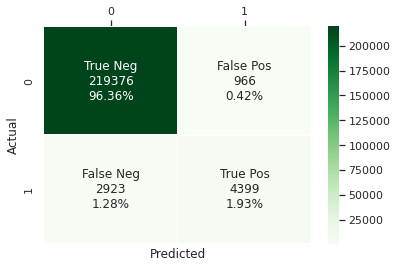

In [39]:
colors = ['Green', 'Red', 'Blue', 'Black']
ax = sns.heatmap(conf_matrix, annot=labels,fmt='', cmap='Greens', linewidth=.5)
ax.set(xlabel="Predicted", ylabel="Actual")
ax.xaxis.tick_top()
#plt.title('Confusion Matrix',  fontdict={'fontname':'DejaVu Sans', 'fontsize':15})


### Precision, Recall, f1_score

In [42]:
from collections import defaultdict

In [61]:
def predict_compare(model, X, y_true):
    y_pred = model.predict(X)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, f1

In [62]:
indicateurs = list()

In [63]:
p, r, f1 = predict_compare(log_reg, X_train_default, y_train)
indicateurs.append(['train',p, r, f1])
p, r, f1 = predict_compare(log_reg, X_test[['total_pages_visited']], y_test)
indicateurs.append(['test',p, r, f1])

In [65]:
##indicateurs = {'precision', 'recall':r , 'F1':f1}
pd.DataFrame(indicateurs, columns=['train_test','precision', 'recall', 'F1'])

,train_test,precision,recall,F1
0,train,0.819944,0.600792,0.693466
1,test,0.829054,0.608181,0.701645


### Hyperparameters

In [66]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}